# Data Load


In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
#%matplotlib tk

import matplotlib 
matplotlib.font_manager._rebuild()

In [3]:
# 한글 폰트가 깨지면 실행하세요! 
import matplotlib.font_manager as fm
fontlist = fm.findSystemFonts(fontpaths = None, fontext='ttf')
# 아래 주석을 지워서 폰트 리스트를 확인하고 한글 폰트를 font_path에 추가합니다
#fontlist[:]

from matplotlib import font_manager, rc
font_path = 'C:\\Users\\mtang\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumSquare.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
path = "./Dataset/"

data = pd.read_csv(path+"kwproja_data.csv")

data

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153390,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
153391,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
153392,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
153393,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


# EDA : Overview

153395 rows X 31 columns

- 매장 속성 정보
  - shop_code -> 식별자 feature, input feature로는 사용하지 않지만 분류를 위해서는 사용할 수 있을 것 같음  
  - shop_name -> input feature로는 사용하지 않음 (NLP deep learning 가능성 있음)
  - longtitude : 경도, latitude : 위도 -> 매장 위치 (회사 근처, 학교 근처 등 매출 영향성 있음) -> 군집화, labeling 필요
  - shop_type_big -> 13 category  -> 업종 (매출 영향성 있음)
  - shop_type_small -> 367 category

- 매출 정보
  - date -> 12 category, 201702~ 201801 까지의 data
  - monthly_gain / avearge_sale_price = 한달 총 판매수

- 매출 통계 정보
  - weekday0~6 : 일 ~ 월
  - time -> 05_10 / 10_14 / 14_18 / 18_20 / 20_22 / 22_24 / 24_05 => 시간대가 동일하지 않음
    - 새벽대는 찾는 손님 적어 시간 길게 잡았을 것
    - 저녁 시간대는 가장 매출이 많이 이뤄지는 prime time 이라 시간대를 짧게 잡았을 것
  - female/male : 20/30/40/50 -> 8 columns

##### monthly_gain과 average_sale_price 중 어느 것을 y값으로 둘 것인가? 
- 월매출 예측 문제로 가정하고 montly_gain 을 y값으로 예측하는 모델 만들기

##### shop_code는 input feature에 넣어야 하는가?
- 특별한 브랜드가 y값을 결정하는 과적합 요소가 될 수 있으므로
- X 에서 shop code, shop name 제외하는 것도 방법
- 어느 위치에 어떤 업종으로 어떤 객단가인 매장을 오픈하면 월매출이 어떻게 될까? 문제
 - X: shop type big, shop type small, longitude, latitude, avg_sale_price, 
 - y: montly_gain

In [5]:
data.columns

Index(['date', 'shop_code', 'shop_name', 'shop_type_big', 'shop_type_small',
       'longitude', 'latitude', 'monthly_gain', 'average_sale_price',
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50', 'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6', 'time_05_10',
       'time_10_14', 'time_14_18', 'time_18_20', 'time_20_22', 'time_22_24',
       'time_00_05'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153395 entries, 0 to 153394
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   date                153395 non-null  int64  
 1   shop_code           153395 non-null  int64  
 2   shop_name           153395 non-null  object 
 3   shop_type_big       148927 non-null  object 
 4   shop_type_small     148927 non-null  object 
 5   longitude           153395 non-null  float64
 6   latitude            153395 non-null  float64
 7   monthly_gain        153395 non-null  float64
 8   average_sale_price  153395 non-null  int64  
 9   female_20           153395 non-null  float64
 10  female_30           153395 non-null  float64
 11  female_40           153395 non-null  float64
 12  female_50           153395 non-null  float64
 13  male_20             153395 non-null  float64
 14  male_30             153395 non-null  float64
 15  male_40             153395 non-nul

### shop_name, shop_code
- shop_code가 식별자 feature, 가게는 동일하지만 가게명이 바뀌는 경우가 존재함
    - shop_name(13,633), shop_code(13,352) -> 약 300 가게 정도는 이름이 바뀐 것으로 추정
    - 확인 결과 총 222가게가 이름을 최소 2번 바꾸었으며 평균 4번, 최대 66번 바꾸었음 
- 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
- 업종 별 매출 예측으로만 봐야 적당할 것으로 보임

In [7]:
# shop_name과 shop_code가 항상 같다면, 위 두 숫자가 같아야 하는데 약 300개의 data가 차이가 남 
# shop_code는 동일하지만(가게는 동일하지만) 업종, 가게명이 바뀌었을 수도 있음 -> shop_code를 식별자 feature로 사용

print(data['shop_name'].nunique())
print(data['shop_code'].nunique())
print(data['date'].unique())

13633
13352
[201703 201702 201705 201704 201707 201706 201709 201708 201711 201710
 201712 201801]


In [8]:
# shop code 를 group by 했을 때 그 안에 몇 종류의 shop name이 있는지 (1이어야 정상)

check_df = data.groupby('shop_code')['shop_name'].nunique().to_frame('shop_name_unique').reset_index()
check_df

,shop_code,shop_name_unique
0,60200446,1
1,60510211,1
2,68700298,1
3,80210201,1
4,82690502,1
...,...,...
13347,99912790101,1
13348,99931830105,1
13349,99950230203,1
13350,99971000120,1


In [9]:
# shop code안에 여러 shop name 있는 경우

check_df2 = check_df[check_df['shop_name_unique'] > 1]
check_df2

,shop_code,shop_name_unique
42,148500219,4
129,308700726,4
159,348700564,2
351,668500219,3
373,708600354,7
...,...,...
13119,96988110220,5
13123,97058190605,4
13129,97238180201,5
13282,99208740105,6


In [10]:
# 총 222가게가 이름을 최소 2번 바꾸었으며 평균 4번, 최대 66번 바꾸었음 

check_df2['shop_name_unique'].describe()

count    222.000000
mean       4.112613
std        6.083203
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       66.000000
Name: shop_name_unique, dtype: float64

In [11]:
# 롯데 월드 안에  놀이기구도 있지만, 편의점, 호텔 등 다는 업종 매출로 잡히는 것들도 있음!
# 결론-> shop code, shop name 은 모델입력으로 적합하지 않음
# 업종 별 매출 예측으로만 봐야 적당할 것으로 보임
data[data['shop_code'] == 148500219]

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
2209,201703,148500219,(주)롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,8.077533e+09,16223,22.14,...,8.11,18.37,29.41,13.38,40.18,25.45,14.15,6.57,0.25,0.01
2303,201702,148500219,(주)롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.168749e+10,17802,17.03,...,14.40,11.53,17.33,18.19,40.34,24.04,11.97,5.26,0.20,0.01
9653,201703,148500219,(주)호텔롯데롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.838370e+08,15464,4.75,...,6.63,17.92,31.97,6.29,52.55,33.35,7.31,0.50,0.00,0.00
11538,201702,148500219,(주)호텔롯데롯데월드,관광/여가/오락,종합위락시설,127.098024,37.511472,1.680387e+08,17158,2.59,...,17.31,6.00,20.68,6.23,56.74,31.08,5.89,0.05,0.00,0.00
18315,201702,148500219,(주) 호텔롯데롯데월드,소매,편의점,127.098024,37.511472,2.459901e+08,4136,20.14,...,14.26,13.50,15.53,17.20,29.62,23.21,13.54,9.70,6.19,0.54
18316,201703,148500219,(주) 호텔롯데롯데월드,소매,편의점,127.098024,37.511472,2.237060e+08,4026,20.71,...,11.54,17.13,20.28,18.38,29.61,22.75,13.53,9.62,5.35,0.76
21113,201702,148500219,(주)호텔롯데롯데월드,숙박,호텔/콘도,127.098024,37.511472,1.999379e+08,9567,13.80,...,15.96,10.68,16.48,5.81,45.34,26.77,15.26,6.82,0.00,0.00
21254,201703,148500219,(주)호텔롯데롯데월드,숙박,호텔/콘도,127.098024,37.511472,1.362055e+08,8612,15.59,...,7.66,18.60,28.46,5.73,46.05,26.44,15.38,6.39,0.00,0.00
21762,201703,148500219,(주)호텔롯데 롯데월드 게임,관광/여가/오락,종합위락시설,127.098024,37.511472,4.197055e+07,6373,18.98,...,7.09,19.82,32.70,2.56,25.26,37.60,20.80,11.76,2.02,0.00
23091,201702,148500219,(주)호텔롯데 롯데월드 게임,관광/여가/오락,종합위락시설,127.098024,37.511472,6.776416e+07,6569,14.04,...,15.28,11.28,16.91,2.66,33.07,33.88,16.91,12.26,1.22,0.00


### Preprocessing for more eda...

In [12]:
# 매출데이터에 0값이 3605개가 잡힘 -> 정확한 eda를 위해서 이를 제거하고 계속 진행하겠음 
preprocessed = data[data.monthly_gain!=0].copy()
#preprocessed
#print(153394-3605)

In [13]:
# issue -> shop_type_big에 관한 2번째 issue를 참고하세요!
# issue -> '음식'과 '음식 ' 두 개로 count 되고 있습니다. 아래 코드로 수정하시길 바랍니다
preprocessed.loc[preprocessed['shop_type_big'] == '음식 ', 'shop_type_big'] = '음식'
print(preprocessed['shop_type_big'].nunique())
print(preprocessed['shop_type_big'].unique())

13
['음식' '소매' '의료' '숙박' '관광/여가/오락' '학문/교육' '생활서비스' '스포츠' '도매/유통/무역' nan '제조'
 '부동산' '전자/정보통신' '기술서비스']


In [14]:
# issue -> shop_type_big에 관한 3번째 issue를 참고하세요! 
# dolphin(fromo hbpark) -> 저는 4,303개의 Nan값도 제거하였습니다. 업종은 매출에 큰 영향을 줄 수 있기 때문입니다. 
# 이로써 최종 145,487개의 data가 남습니다 
print(preprocessed['shop_type_big'].unique())
print(len(preprocessed['shop_type_big'].unique()))
print(preprocessed['shop_type_big'].isnull().value_counts())
#145,487 + 4,303 = 149,790 

['음식' '소매' '의료' '숙박' '관광/여가/오락' '학문/교육' '생활서비스' '스포츠' '도매/유통/무역' nan '제조'
 '부동산' '전자/정보통신' '기술서비스']
14
False    145487
True       4303
Name: shop_type_big, dtype: int64


In [15]:
null_index = preprocessed[preprocessed['shop_type_big'].isnull()==True].index
preprocessed = preprocessed.drop(null_index).reset_index().drop("index", axis=1)
preprocessed

,date,shop_code,shop_name,shop_type_big,shop_type_small,longitude,latitude,monthly_gain,average_sale_price,female_20,...,weekday4,weekday5,weekday6,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
0,201703,95662180105,닥터빈스,음식,카페 일반,126.927911,37.558043,5.696400e+06,9982,9.58,...,17.15,11.92,6.34,1.15,72.78,23.14,2.93,0.00,0.00,0.00
1,201703,1140530114,전주식당,음식,한정식/백반 전문점,127.022532,37.506856,8.496120e+06,14503,5.08,...,19.38,16.35,10.82,0.83,76.82,13.25,9.09,0.00,0.00,0.00
2,201703,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,1.036515e+08,72527,10.51,...,21.18,21.59,18.04,4.64,8.50,2.40,18.67,50.05,9.84,5.89
3,201702,43562400602,삼육가,음식,고기구이 전문점,127.025013,37.505696,9.678575e+07,70225,12.10,...,26.08,22.60,15.51,2.68,8.09,5.77,10.15,54.61,16.25,2.45
4,201702,88958530107,아디다스퍼포먼스타임스퀘어,소매,스포츠용품 판매,126.903306,37.517063,1.266359e+08,91884,15.04,...,16.44,10.38,22.71,0.43,26.38,39.20,25.30,8.69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145482,201801,45688770211,(주)스위틀,학문/교육,학원-기타,127.040033,37.525081,2.277527e+07,1114250,0.00,...,26.48,0.00,0.00,73.52,26.48,0.00,0.00,0.00,0.00,0.00
145483,201712,65130960211,젤 에스테틱,소매,화장품 판매,127.046604,37.524470,1.555300e+06,33556,0.00,...,5.30,23.18,20.53,23.18,52.65,13.58,10.60,0.00,0.00,0.00
145484,201712,708600354,카카오아이엑스 주식회사,소매,장난감/오락기기/용품 판매,127.060835,37.509203,3.134106e+08,39543,31.27,...,13.02,13.71,13.84,6.60,44.94,36.45,12.01,0.00,0.00,0.00
145485,201712,51363910128,월드타워약국,의료,약국,127.103491,37.513101,7.927725e+07,9874,23.15,...,10.42,11.71,16.84,4.45,25.70,30.00,22.70,16.61,0.55,0.00


In [16]:
# 다행히도 shop_type_small에 대한 Nan값은 shop_type_big에서 제거함으로써 같이 제거된것으로 보입니다 
# preprocessed -> eda를 위해 전처리한 dataframe, data대신 해당 dataframe에서 쪼개서 eda를 진행합니다 
#print(df_check['shop_type_small'].unique())
print(len(preprocessed['shop_type_small'].unique()))
print(preprocessed['shop_type_small'].isnull().value_counts())

367
False    145487
Name: shop_type_small, dtype: int64


### shop_type_big, shopt_type_small, monthly_gain
- 매출 데이터(monthly_gain)에 missing value 결측치 존재(3,605개) -> 제거하고 확인 총 149,789개 
- shop_type_big에 missing vlaue 결측치 존재(4,303개) -> 제거하고 확인 총 145,487개
- monthly_gain 
    - mean|     80,595,343.95 | 8천
    - min |               5.01| 
    - 25% |	     4,557,295.50 | 4백만
    - 50% |	    15,793,050.00 | 1천5백만
    - 75% |	    43,372,024.00 | 4천3백만
    - max | 65,341,444,752.55 | 653억4천1백만 (원래 1000억 넘게 나왔는데 결측치때문이였던 것 같음)
- average_sale_price
    - mean|    190,292.08
    - min |          1.00
    - 25% |     18,559.00 | 1천8백
    - 50% |     47,145.00 | 4천7백
    - 75% |    141,594.50 | 1억4천
    - max | 82,360,957.00 | 823억6천
- shop type big (13)
    - 음식(51004) 소매(47318) 의료(16618) 생활서비스(16074) 학문/교육(4495) 관광/여가/오락(3676) 도매/유통/무역(2607) 스포츠(1525) 숙박(1198) 제조(518) 부동산(335) 전자/정보통신(98) 기술서비스(21)
    - min 
    - '기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '스포츠', '도매/유통/무역', '음식', '학문/교육', '관광/여가/오락', '소매', '생활서비스'
    - 부동산(10,060) 기준 이하(7곳)은 비슷함
    - mean 
    - '도매/유통/무역', '숙박', '제조', '전자/정보통신', '소매', '의료', '관광/여가/오락', '학문/교육', '음식', '생활서비스', '스포츠', '부동산', '기술서비스'
    - max 
    - '도매/유통/무역', '소매', '관광/여가/오락', '제조', '숙박', '의료', '전자/정보통신', '생활서비스', '학문/교육', '음식', '스포츠', '부동산', '기술서비스'
- 평균만 놓고 보아도 가장 낮은 업종은 천만원대, 가장 높은 업종은 억대이다 
- shop type small (367)


### monthly_gain

In [73]:
df_check = preprocessed[['monthly_gain','shop_type_small','shop_type_big', 'average_sale_price']].copy()
# 데이터 값 실수. 소수점 두째자리까지 표시df
pd.set_option('display.float_format', '{:.2f}'.format) 

df_check

,monthly_gain,shop_type_small,shop_type_big,average_sale_price
0,5696400.00,카페 일반,음식,9982
1,8496120.00,한정식/백반 전문점,음식,14503
2,103651502.50,고기구이 전문점,음식,72527
3,96785751.00,고기구이 전문점,음식,70225
4,126635883.60,스포츠용품 판매,소매,91884
...,...,...,...,...
145482,22775270.00,학원-기타,학문/교육,1114250
145483,1555300.00,화장품 판매,소매,33556
145484,313410614.50,장난감/오락기기/용품 판매,소매,39543
145485,79277246.00,약국,의료,9874


In [74]:
pd.DataFrame(df_check['monthly_gain']).describe()

,monthly_gain
count,145487.00
mean,80595343.95
std,1060799560.71
min,5.01
25%,4557295.50
50%,15793050.00
75%,43372024.00
max,65341444752.55


### average_sale_price

In [75]:
pd.DataFrame(df_check['average_sale_price']).describe()

,average_sale_price
count,145487.00
mean,190292.08
std,816533.53
min,1.00
25%,18559.00
50%,47145.00
75%,141594.50
max,82360957.00


### shop_type_big

In [85]:
group_big_gain = df_check.drop(['shop_type_small', 'average_sale_price'], axis=1).groupby('shop_type_big')
df_group_big_gain = group_big_gain.describe().droplevel(axis=1,level=0)

group_big_ave = df_check.drop(['shop_type_small', 'monthly_gain'], axis=1).groupby('shop_type_big')
df_group_big_ave = group_big_ave.describe().droplevel(axis=1,level=0)

# monthly_gain을 shop_type_big 분야별로 정렬하여 출력
print("내림차순 기준 분야별로 정렬하여 출력합니다 - monthly_gain")
print("min: ", list(df_group_big_gain.sort_values(by=['min'], ascending=False).index))
print("mean: ", list(df_group_big_gain.sort_values(by=['mean'], ascending=False).index))
print("max: ", list(df_group_big_gain.sort_values(by=['max'], ascending=False).index))

# average_sale_price을 shop_type_big 분야별로 정렬하여 출력
print("\n\n내림차순 기준 분야별로 정렬하여 출력합니다 - average_sale_price")
print("min: ", list(df_group_big_ave.sort_values(by=['min'], ascending=False).index))
print("mean: ", list(df_group_big_ave.sort_values(by=['mean'], ascending=False).index))
print("max: ", list(df_group_big_ave.sort_values(by=['max'], ascending=False).index))

내림차순 기준 분야별로 정렬하여 출력합니다 - monthly_gain
min:  ['기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '스포츠', '도매/유통/무역', '음식', '학문/교육', '관광/여가/오락', '소매', '생활서비스']
mean:  ['도매/유통/무역', '숙박', '제조', '전자/정보통신', '소매', '의료', '관광/여가/오락', '학문/교육', '음식', '생활서비스', '스포츠', '부동산', '기술서비스']
max:  ['도매/유통/무역', '소매', '관광/여가/오락', '제조', '숙박', '의료', '전자/정보통신', '생활서비스', '학문/교육', '음식', '스포츠', '부동산', '기술서비스']


내림차순 기준 분야별로 정렬하여 출력합니다 - average_sale_price
min:  ['기술서비스', '전자/정보통신', '제조', '의료', '부동산', '숙박', '도매/유통/무역', '음식', '학문/교육', '스포츠', '관광/여가/오락', '소매', '생활서비스']
mean:  ['기술서비스', '도매/유통/무역', '학문/교육', '제조', '스포츠', '의료', '숙박', '생활서비스', '소매', '부동산', '전자/정보통신', '관광/여가/오락', '음식']
max:  ['도매/유통/무역', '소매', '제조', '기술서비스', '음식', '생활서비스', '의료', '스포츠', '학문/교육', '숙박', '관광/여가/오락', '부동산', '전자/정보통신']


<AxesSubplot:xlabel='shop_type_big', ylabel='monthly_gain'>

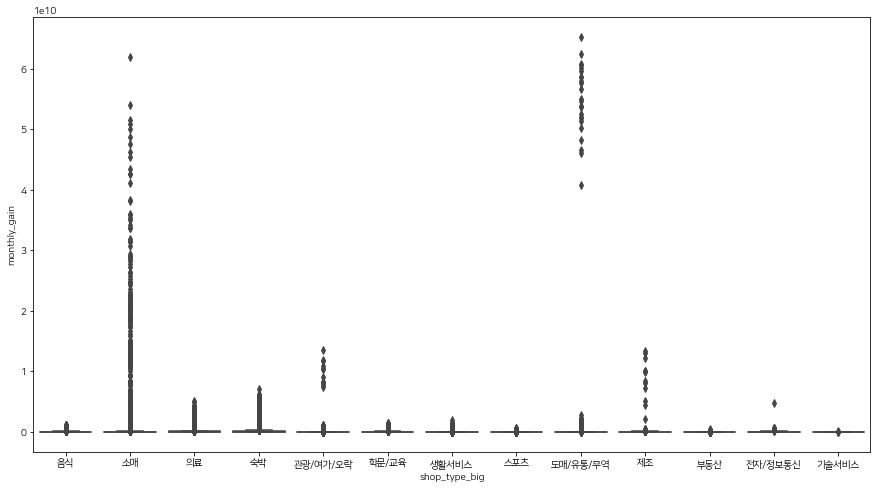

In [79]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='monthly_gain', data=df_check)

<AxesSubplot:xlabel='shop_type_big', ylabel='average_sale_price'>

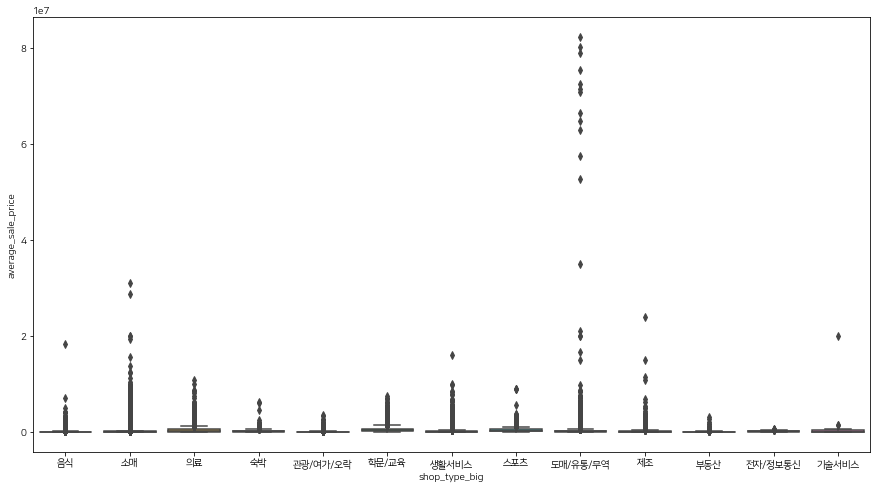

In [80]:
rcParams['figure.figsize'] = 15,8
sns.boxplot(x='shop_type_big', y='average_sale_price', data=df_check)

관광/여가/오락         AxesSubplot(0.1,0.736957;0.173913x0.163043)
기술서비스       AxesSubplot(0.308696,0.736957;0.173913x0.163043)
도매/유통/무역    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
부동산         AxesSubplot(0.726087,0.736957;0.173913x0.163043)
생활서비스            AxesSubplot(0.1,0.541304;0.173913x0.163043)
소매          AxesSubplot(0.308696,0.541304;0.173913x0.163043)
숙박          AxesSubplot(0.517391,0.541304;0.173913x0.163043)
스포츠         AxesSubplot(0.726087,0.541304;0.173913x0.163043)
음식               AxesSubplot(0.1,0.345652;0.173913x0.163043)
의료          AxesSubplot(0.308696,0.345652;0.173913x0.163043)
전자/정보통신     AxesSubplot(0.517391,0.345652;0.173913x0.163043)
제조          AxesSubplot(0.726087,0.345652;0.173913x0.163043)
학문/교육                AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

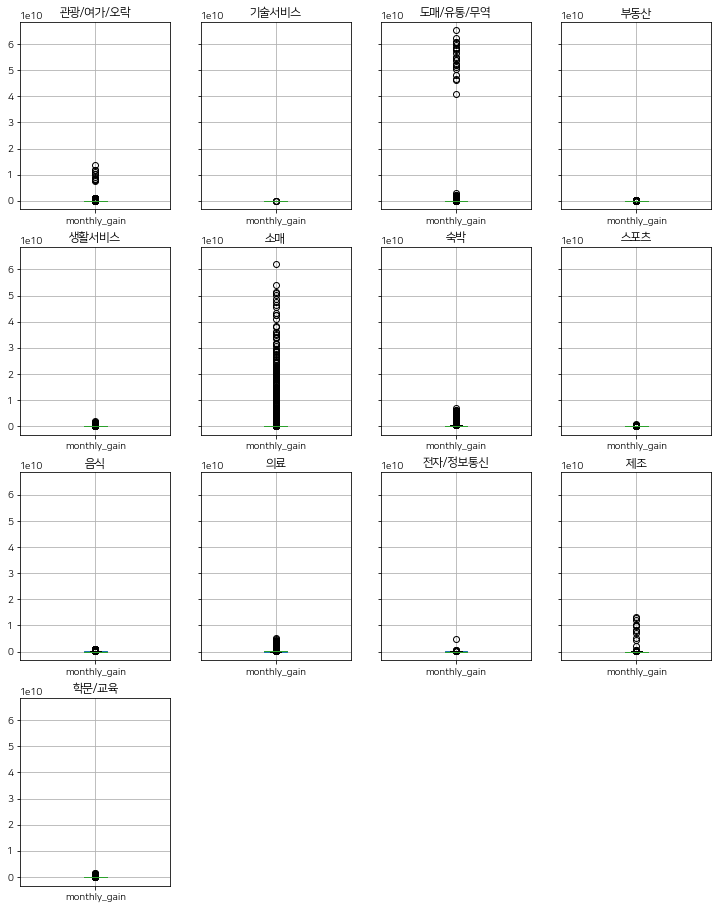

In [86]:
group_big_gain.boxplot(figsize=(12,16))

관광/여가/오락         AxesSubplot(0.1,0.736957;0.173913x0.163043)
기술서비스       AxesSubplot(0.308696,0.736957;0.173913x0.163043)
도매/유통/무역    AxesSubplot(0.517391,0.736957;0.173913x0.163043)
부동산         AxesSubplot(0.726087,0.736957;0.173913x0.163043)
생활서비스            AxesSubplot(0.1,0.541304;0.173913x0.163043)
소매          AxesSubplot(0.308696,0.541304;0.173913x0.163043)
숙박          AxesSubplot(0.517391,0.541304;0.173913x0.163043)
스포츠         AxesSubplot(0.726087,0.541304;0.173913x0.163043)
음식               AxesSubplot(0.1,0.345652;0.173913x0.163043)
의료          AxesSubplot(0.308696,0.345652;0.173913x0.163043)
전자/정보통신     AxesSubplot(0.517391,0.345652;0.173913x0.163043)
제조          AxesSubplot(0.726087,0.345652;0.173913x0.163043)
학문/교육                AxesSubplot(0.1,0.15;0.173913x0.163043)
dtype: object

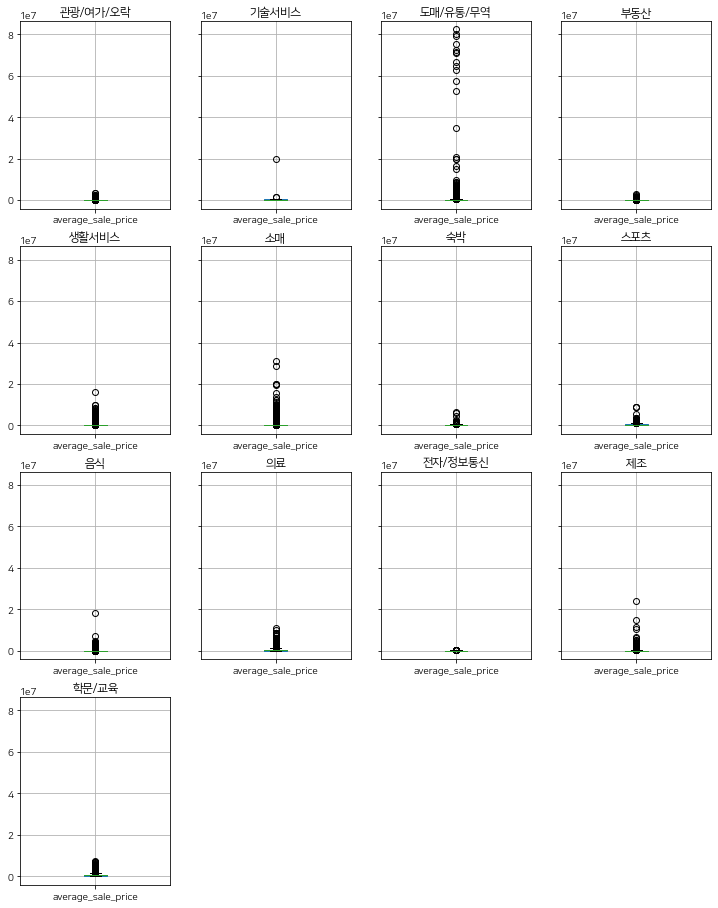

In [87]:
group_big_ave.boxplot(figsize=(12,16))

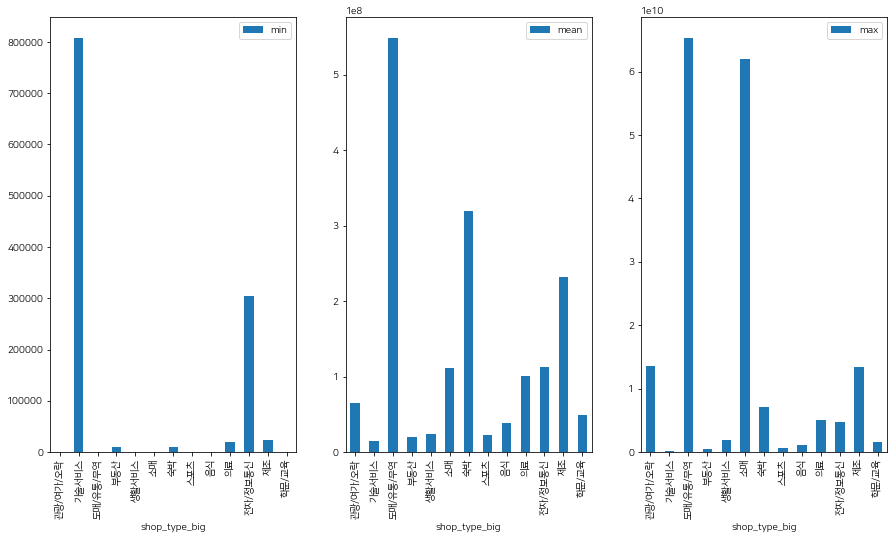

In [88]:
fig, axes = plt.subplots(1, 3)

df_group_big_gain.plot.bar(ax = axes[0], y='min')
df_group_big_gain.plot.bar(ax = axes[1], y='mean')
df_group_big_gain.plot.bar(ax = axes[2], y='max')

plt.rcParams['figure.figsize'] = [14, 6]
plt.show()

### shop_type_small

In [89]:
#pd.set_option('display.max_rows', 14)
group_small = df_check.groupby('shop_type_small')
group_small.describe()

monthly_gain                                         \
                       count         mean          std          min   
shop_type_small                                                       
가구 제조                  12.00 325209469.26  86098529.56 194228080.80   
가구 판매-중고              225.00  65620765.76 107607818.94    125750.00   
가발 판매                  11.00   2399512.73   2886515.06    202000.00   
가방 제조                  14.00  41660481.79  16972529.98   4623275.00   
가방/구두 수선               20.00   9444557.00   8012990.42    187590.00   
...                      ...          ...          ...          ...   
화훼/조경/작물 도매            72.00   9395754.45  14255725.62     76050.00   
화훼/조경/작물 재배            12.00   3804386.25   1643307.48   1945570.00   
회/수산물 일반              495.00  42433795.04  37962390.84    413205.00   
회계서비스-일반              478.00  17272984.12  30011516.77         5.01   
휴대폰 판매                 10.00     42428.47     20285.51     20200.00   

                                                                     \
                         25%          50%          75%          max   
shop_type_small                                                       
가구 제조           272035385.45 311795491.55 369982240.12 479638496.00   
가구 판매-중고          5322769.20  16445761.80  77907088.50 541896810.00   
가발 판매              428250.00    561000.00   4432300.00   8343000.00   
가방 제조            38609842.50  45940280.00  52341987.50  60880560.00   
가방/구두 수선           919575.00  11053325.00  14928112.50  21962450.00   
...                      ...          ...          ...          ...   
화훼/조경/작물 도매       1653181.25   3308322.50  12514766.25  69438030.00   
화훼/조경/작물 재배       2682581.25   3811462.50   4304842.50   7992040.00   
회/수산물 일반         15472372.50  31405950.00  55310442.75 247195905.00   
회계서비스-일반          1583920.00   5896677.50  21510843.75 240448350.00   
휴대폰 판매              29115.00     40720.00     44696.18     92700.00   

                average_sale_price                                            \
                             count       mean        std       min       25%   
shop_type_small                                                                
가구 제조                        12.00  401603.00  105063.07 263728.00 341093.50   
가구 판매-중고                    225.00 1016358.93 1923896.08  11661.00  78779.00   
가발 판매                        11.00  131848.55  146528.12  30000.00  40000.00   
가방 제조                        14.00  193753.21  334075.30  68626.00  72395.50   
가방/구두 수선                     20.00   73935.95   25273.93  18500.00  61835.25   
...                            ...        ...        ...       ...       ...   
화훼/조경/작물 도매                  72.00   75535.96  127175.43   7500.00  25000.00   
화훼/조경/작물 재배                  12.00   42764.08   33471.76  18957.00  23440.00   
회/수산물 일반                    495.00   88084.28   53953.41  13062.00  53642.50   
회계서비스-일반                    478.00  392556.35  718758.56      1.00  33966.25   
휴대폰 판매                       10.00    7447.00    2032.04   4000.00   5750.00   

                                                  
                      50%        75%         max  
shop_type_small                                   
가구 제조           359771.00  435534.25   660823.00  
가구 판매-중고        352954.00 1124222.00 19320000.00  
가발 판매            45000.00  185833.50   405000.00  
가방 제조            81931.00   90983.75  1300000.00  
가방/구두 수선         71826.50   92173.50   115000.00  
...                   ...        ...         ...  
화훼/조경/작물 도매      30562.50   42985.25   850956.00  
화훼/조경/작물 재배      34649.00   43304.75   142182.00  
회/수산물 일반         78097.00  112258.50   371865.00  
회계서비스-일반        117045.00  458185.50  8250000.00  
휴대폰 판매            8000.00    8867.50    10000.00  

[367 rows x 16 columns]

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Monthly gain Histogram with Density Plot')

C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


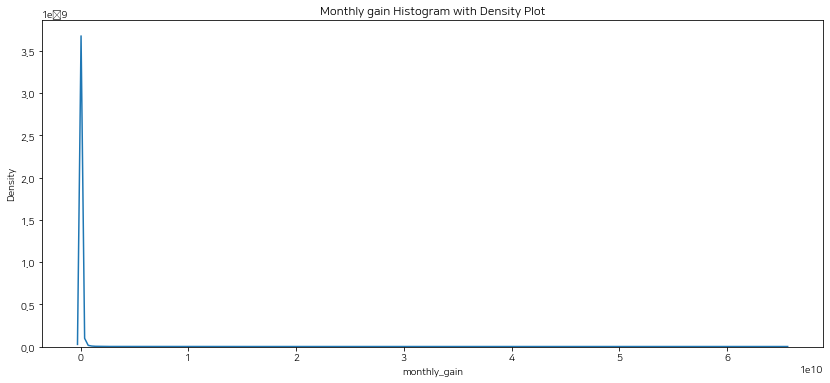

In [90]:
# density plot only
ax = plt.subplots()
ax = sns.distplot(df_check['monthly_gain'], hist = False)
ax.set_title('Monthly gain Histogram with Density Plot')

C:\Users\mtang\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Average sale price Histogram with Density Plot')

C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


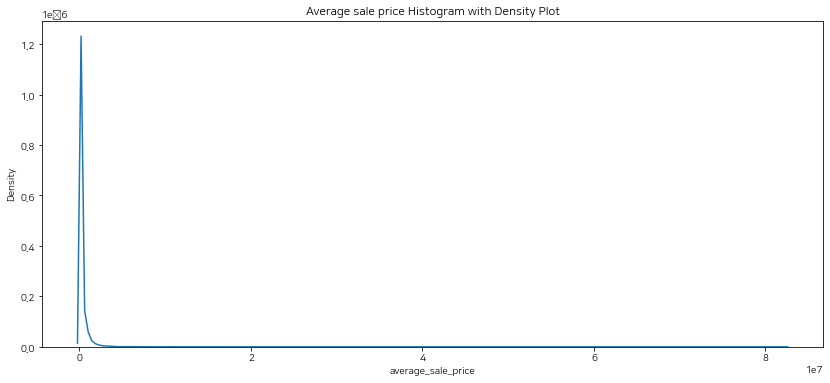

In [92]:
# density plot only
ax = plt.subplots()
ax = sns.distplot(df_check['average_sale_price'], hist = False)
ax.set_title('Average sale price Histogram with Density Plot')

### average sale price, monthly gain correlation 
- 따로 단가와 매출의 상관관계를 분석합니다

In [96]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_check['shop_type_big'] = le.fit_transform(list(df_check['shop_type_big']))   # fit transform으로 한번에 처리 가능

le = LabelEncoder()

df_check['shop_type_small'] = le.fit_transform(list(df_check['shop_type_small'])) 
#le.classes_
df_check

,monthly_gain,shop_type_small,shop_type_big,average_sale_price
0,5696400.00,308,8,9982
1,8496120.00,350,8,14503
2,103651502.50,17,8,72527
3,96785751.00,17,8,70225
4,126635883.60,173,5,91884
...,...,...,...,...
145482,22775270.00,327,12,1114250
145483,1555300.00,361,5,33556
145484,313410614.50,261,5,39543
145485,79277246.00,193,9,9874


C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mtang\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


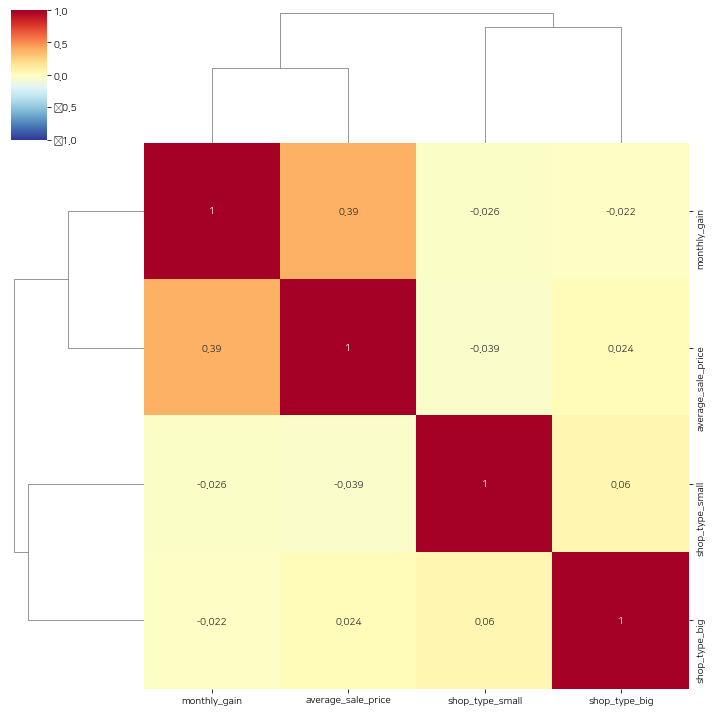

In [98]:
corr = df_check.corr()

sns.clustermap(corr, 
               annot = True,      # 실제 값 화면에 나타내기
               cmap = 'RdYlBu_r',  # Red, Yellow, Blue 색상으로 표시
               vmin = -1, vmax = 1, #컬러차트 -1 ~ 1 범위로 표시
              )

### longitude, latitude 
- longitude 경도(세로)
- latitude 위도(가로)
- Clustering 결과 대략 9개의 클러스터로 나뉘는 것을 알 수 있음
- 각 클러스터별 데이터 개수, monthly_gain의 평균값을 오름차순으로 정리한 것은 다음과 같음
- count:  [7, 8, 6, 0, 5, 4, 3, 2, 1]
- mean:  [5, 2, 3, 4, 1, 0, 6, 8, 7]

In [25]:
pd.set_option('display.float_format', None)
df_geo = preprocessed[['longitude', 'latitude', 'monthly_gain']].copy()

drop_longitude = df_geo[df_geo['longitude']==0].index 
drop_latitude = df_geo[df_geo['latitude']==0].index 
print(len(drop_longitude))
print(len(drop_latitude))

0
0


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

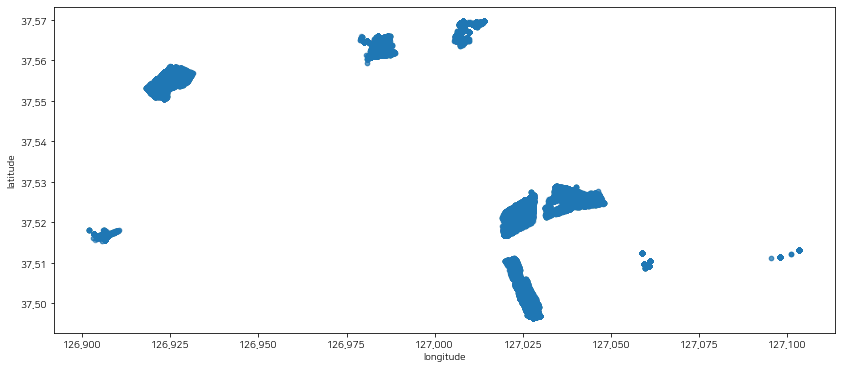

In [26]:
df_geo.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

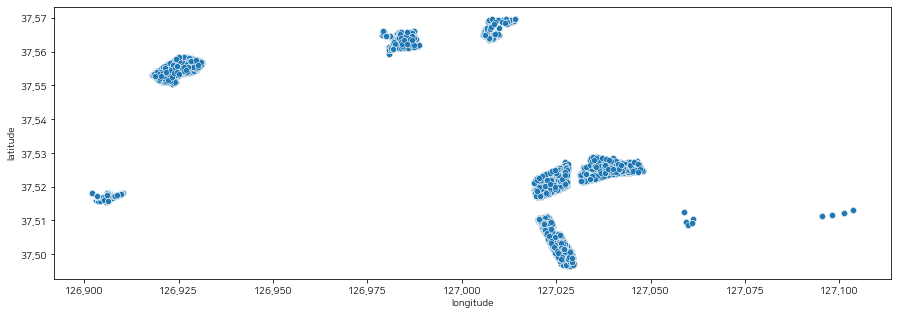

In [27]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='longitude',y='latitude',data=df_geo)

In [28]:
from sklearn.cluster import KMeans

#points = df_gps[['latitude', 'longitude']].values
kmeans = KMeans(n_clusters=9).fit(df_geo[['latitude', 'longitude']])
kmeans.cluster_centers_

array([[ 37.56303621, 126.9841561 ],
       [ 37.50237545, 127.02577178],
       [ 37.55455139, 126.92418409],
       [ 37.52161101, 127.02414348],
       [ 37.52572319, 127.03891377],
       [ 37.56771489, 127.0085615 ],
       [ 37.51695744, 126.9056348 ],
       [ 37.51213945, 127.10025794],
       [ 37.51137948, 127.05952426]])

In [29]:
kmeans.labels_

array([2, 1, 1, ..., 8, 7, 7])

In [30]:
df_geo['cluster'] = kmeans.labels_
df_geo

,longitude,latitude,monthly_gain,cluster
0,126.927911,37.558043,5.696400e+06,2
1,127.022532,37.506856,8.496120e+06,1
2,127.025013,37.505696,1.036515e+08,1
3,127.025013,37.505696,9.678575e+07,1
4,126.903306,37.517063,1.266359e+08,6
...,...,...,...,...
145482,127.040033,37.525081,2.277527e+07,4
145483,127.046604,37.524470,1.555300e+06,4
145484,127.060835,37.509203,3.134106e+08,8
145485,127.103491,37.513101,7.927725e+07,7


Text(0.5, 1.0, 'k-mean')

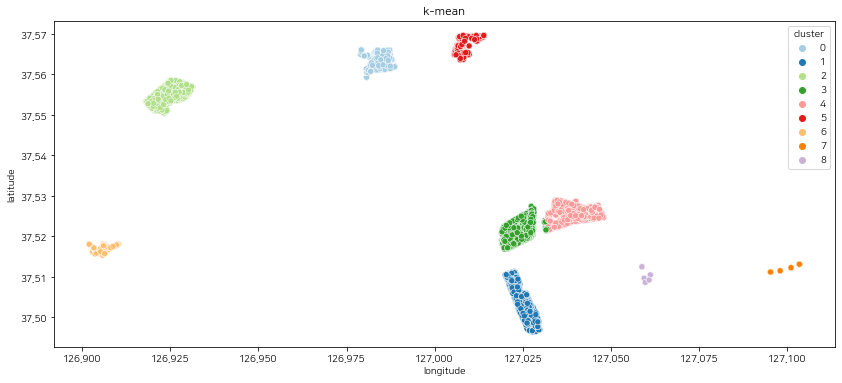

In [33]:
sns.scatterplot(x='longitude' , y='latitude', hue="cluster", data=df_geo, palette="Paired")
plt.title('k-mean')

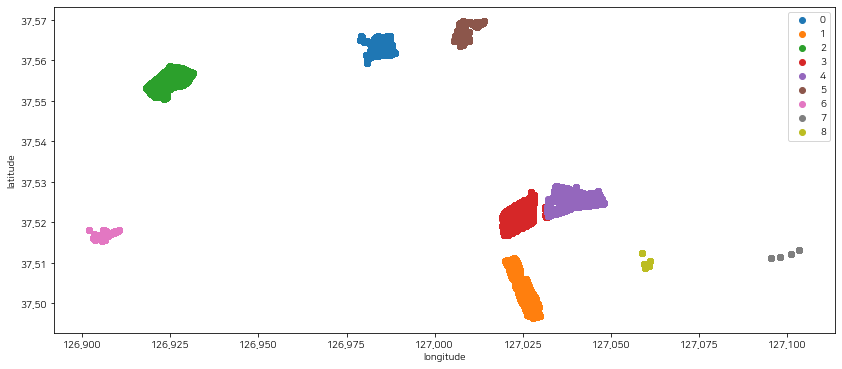

In [38]:
for i in range(9):
    labels=df_geo[df_geo["cluster"]==i]
    plt.scatter(labels['longitude'],labels['latitude'],label=i)

plt.legend()
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.show()

In [50]:
pd.set_option('display.float_format', '{:.2f}'.format) 
group_geo = df_geo.groupby('cluster')
group_geo['monthly_gain'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,15791.00,105672830.35,1677737477.04,5010.00,2859480.00,11195894.00,31834662.90,61940852860.50
1,30012.00,70787554.93,185487959.72,5.01,8706638.75,27148992.15,66637830.75,5053779571.50
2,26474.00,32223649.99,204755767.12,501.00,4424101.00,12041535.00,30423912.00,13366686124.44
3,24266.00,48044592.33,465217779.02,51.10,5670637.50,16453015.00,38454882.38,27816363643.85
4,22922.00,63236208.11,467029930.87,501.00,7214838.38,21698835.50,52931479.88,23188943027.60
5,16092.00,20936585.17,278297207.82,50.50,817600.00,3036060.00,13230412.50,13101776664.99
6,5003.00,135685239.80,939535616.87,15450.00,8062970.00,28693110.00,72704567.75,15189611552.70
7,1800.00,722460192.13,3252835817.77,18611.00,8069275.15,35448545.95,104961069.15,34258990371.00
8,3127.00,686858510.88,5062248788.55,12072.00,13851684.50,45011422.65,109184410.50,65341444752.55


In [56]:
print("내림차순 기준 클러스터별로 정렬하여 출력합니다")
print("count: ", list(group_geo['monthly_gain'].describe().sort_values(by=['count']).index))
print("mean: ", list(group_geo['monthly_gain'].describe().sort_values(by=['mean']).index))
group_geo['monthly_gain'].describe().sort_values(by=['count'])

내림차순 기준 클러스터별로 정렬하여 출력합니다
count:  [7, 8, 6, 0, 5, 4, 3, 2, 1]
mean:  [5, 2, 3, 4, 1, 0, 6, 8, 7]


,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
7,1800.00,722460192.13,3252835817.77,18611.00,8069275.15,35448545.95,104961069.15,34258990371.00
8,3127.00,686858510.88,5062248788.55,12072.00,13851684.50,45011422.65,109184410.50,65341444752.55
6,5003.00,135685239.80,939535616.87,15450.00,8062970.00,28693110.00,72704567.75,15189611552.70
0,15791.00,105672830.35,1677737477.04,5010.00,2859480.00,11195894.00,31834662.90,61940852860.50
5,16092.00,20936585.17,278297207.82,50.50,817600.00,3036060.00,13230412.50,13101776664.99
4,22922.00,63236208.11,467029930.87,501.00,7214838.38,21698835.50,52931479.88,23188943027.60
3,24266.00,48044592.33,465217779.02,51.10,5670637.50,16453015.00,38454882.38,27816363643.85
2,26474.00,32223649.99,204755767.12,501.00,4424101.00,12041535.00,30423912.00,13366686124.44
1,30012.00,70787554.93,185487959.72,5.01,8706638.75,27148992.15,66637830.75,5053779571.50


<AxesSubplot:xlabel='cluster'>

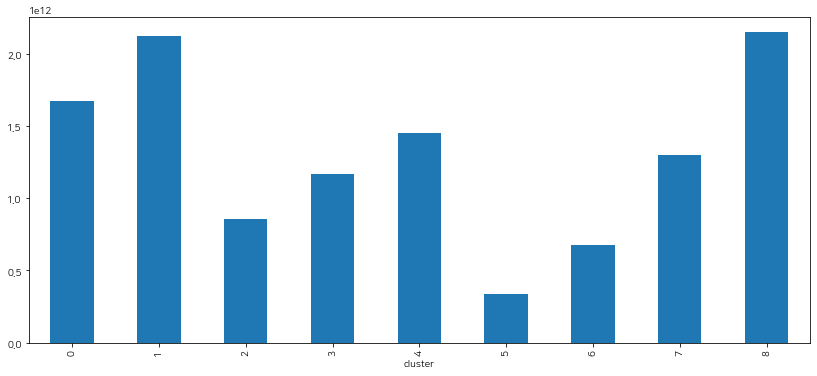

In [49]:
# 클러스터별 매출 총 합산액
group_geo['monthly_gain'].sum().plot.bar()

### 성별, 요일, 시간 
- 확인 안하면 큰일날 뻔 했다... 
- 성별에 0만 가득찬 데이터가 1,187개 존재 
- 제거하면 총 144,300개 data

In [140]:
pd.set_option('display.float_format', None)

df_gender = preprocessed[[ 
       'female_20', 'female_30', 'female_40', 'female_50', 'male_20',
       'male_30', 'male_40', 'male_50']].copy()
df_time = preprocessed[[
    'weekday0', 'weekday1', 'weekday2',
       'weekday3', 'weekday4', 'weekday5', 'weekday6']].copy()
df_week = preprocessed[['time_05_10', 'time_10_14', 'time_14_18',
            'time_18_20', 'time_20_22', 'time_22_24', 'time_00_05']].copy()

In [141]:
df_gender.describe()

,female_20,female_30,female_40,female_50,male_20,male_30,male_40,male_50
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,19.039261,13.612653,10.842249,12.219886,11.868238,11.972859,9.271460,10.357555
std,19.599087,16.188914,15.706277,18.934495,14.769153,14.712838,14.536199,16.683867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.265000,2.220000,0.890000,1.370000,0.000000,0.000000,0.000000,0.020000
50%,14.430000,9.990000,6.480000,5.740000,7.250000,8.510000,4.900000,4.770000
75%,29.670000,18.040000,13.020000,13.510000,18.170000,17.040000,11.540000,11.710000
max,100.000000,100.000000,100.000000,100.010000,100.000000,100.000000,100.000000,100.010000


In [142]:
df_time.describe()

,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weekday6
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,10.211496,13.048373,13.892918,14.098295,14.470436,16.685863,17.592633
std,13.121327,15.001117,15.089252,14.883808,15.070688,15.732202,16.583357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.280000,5.070000,5.640000,5.940000,8.280000,6.300000
50%,7.840000,10.750000,11.550000,12.170000,12.510000,14.780000,15.740000
75%,16.070000,16.320000,17.270000,17.210000,17.700000,20.320000,23.410000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [143]:
df_week.describe()

,time_05_10,time_10_14,time_14_18,time_18_20,time_20_22,time_22_24,time_00_05
count,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000,145487.000000
mean,5.744538,29.035394,24.397491,15.512641,12.883558,9.088619,3.337769
std,13.495798,24.692053,22.488012,15.822978,15.928525,17.590249,10.471417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.130000,5.820000,1.950000,0.000000,0.000000,0.000000
50%,0.000000,26.210000,21.470000,13.710000,8.560000,0.000000,0.000000
75%,4.770000,42.700000,34.530000,22.700000,19.560000,9.860000,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [154]:
df_gender.sum(axis=1).describe()

count    145487.000000
mean         99.184161
std           8.995725
min           0.000000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.030000
dtype: float64

In [171]:
# gender 열에 0.0으로만 가득한 데이터가 1,187개가 존재 
gender_index = df_gender[df_gender.sum(axis=1)==0].index

print(144300+1187)
df_gender=df_gender.drop(gender_index)
df_gender

145487


,female_20,female_30,female_40,female_50,male_20,male_30,male_40,male_50
0,9.58,5.43,18.68,4.63,27.62,8.89,18.47,6.71
1,5.08,12.12,9.68,8.15,9.68,9.75,14.77,30.78
2,10.51,9.64,4.05,3.57,23.30,31.56,8.38,8.98
3,12.10,11.48,6.31,4.77,15.64,30.60,12.65,6.45
4,15.04,10.48,16.90,9.56,21.64,11.67,8.98,5.74
...,...,...,...,...,...,...,...,...
145482,0.00,0.00,25.35,22.82,0.00,26.48,0.00,25.35
145483,0.00,0.00,46.48,44.72,0.00,0.00,8.80,0.00
145484,31.27,14.62,9.13,2.91,19.56,12.47,6.81,3.24
145485,23.15,18.09,9.60,9.93,11.81,10.03,7.25,10.14


In [168]:
df_week.sum(axis=1).describe()

count    145487.000000
mean        100.000010
std           0.005688
min          99.980000
25%         100.000000
50%         100.000000
75%         100.000000
max         100.020000
dtype: float64